<a href="https://colab.research.google.com/github/abrham17/knap-sack/blob/main/bottomupknap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **knap-sack problem**

given a set of objects which have both weight and value. what is the maximum
value that we can obtain by selecting a subset of these objects such that the sum of the weights does not exceed a certain capacity.

**Brute Force approach**

In [7]:
def knapSackBf(cap, n, weights, values):
    if n == len(weights) or cap == 0:
        return 0
    if weights[n] > cap:
        return knapSackBf(cap, n + 1, weights, values)
    else:
        return max(values[n] + knapSackBf(cap - weights[n], n + 1, weights, values) , knapSackBf(cap,  n+ 1, weights, values))

**dynamic programming**

In [13]:
def knapSackDp(weights, values, n, capacity, memo):
    if n == len(weights) or capacity == 0:
        return 0

    if (n, capacity) in memo:
        return memo[(n, capacity)]

    if weights[n] > capacity:
        result = knapSackDp(weights, values, n + 1, capacity, memo)
    else:
        result = max(values[n] + knapSackDp(weights, values, n+1, capacity - weights[n], memo) , knapSackDp(weights, values, n+1, capacity, memo))

    memo[(n, capacity)] = result
    return result

**comparing the results using matplotlib and time**

In [11]:
# calculating time for brute force starting from n 3 upto 30 by generating random numbers for weights and values
import random
import time
ns = 31
test_ns = list(range(3, ns))
execution_times = []

for n in test_ns:
    weights = [random.randint(1, 20) for _ in range(n)]
    values = [random.randint(1, 20) for _ in range(n)]
    capacity = int(sum(weights) * 0.7)
    # Time for the brute-force solution
    start = time.time()
    print(knapSackBf(capacity, 0, weights, values))
    end = time.time()

    execution_times.append(end - start)
print(execution_times)

37
52
54
45
73
82
71
90
150
94
110
135
119
138
154
150
175
146
168
229
208
262
238
311
251
295
243
274
[4.696846008300781e-05, 1.1682510375976562e-05, 1.6450881958007812e-05, 2.47955322265625e-05, 4.2438507080078125e-05, 8.296966552734375e-05, 0.00016117095947265625, 0.0002715587615966797, 0.0005462169647216797, 0.0011370182037353516, 0.0024471282958984375, 0.005005598068237305, 0.009322643280029297, 0.018778085708618164, 0.038245201110839844, 0.07802033424377441, 0.1515357494354248, 0.3062570095062256, 0.6229426860809326, 1.2404735088348389, 2.5067057609558105, 5.011944770812988, 9.964808225631714, 20.132940769195557, 40.04763674736023, 81.173348903656, 162.06282663345337, 322.8933653831482]


In [14]:
# calculating time for brute force starting from n 3 upto 30 by generating random numbers for weights and values
import random
import time
ns = 31
test_ns = list(range(3, ns))
execution_times_dp = []

for n in test_ns:
    weights = [random.randint(1, 20) for _ in range(n)]
    values = [random.randint(1, 20) for _ in range(n)]
    capacity = int(sum(weights) * 0.7)
    # Time for the brute-force solution
    start = time.time()
    knapSackDp(weights , values , 0 ,capacity , {})
    end = time.time()

    execution_times_dp.append(end - start)
print(execution_times_dp)

[1.2159347534179688e-05, 9.059906005859375e-06, 1.430511474609375e-05, 2.2172927856445312e-05, 3.266334533691406e-05, 7.772445678710938e-05, 0.0001163482666015625, 0.0001780986785888672, 0.00016570091247558594, 0.0001811981201171875, 0.0003254413604736328, 0.00047516822814941406, 0.0005650520324707031, 0.0006840229034423828, 0.000713348388671875, 0.0008542537689208984, 0.0009036064147949219, 0.0009145736694335938, 0.0011758804321289062, 0.0010333061218261719, 0.0010960102081298828, 0.0011396408081054688, 0.002237558364868164, 0.002007007598876953, 0.002002716064453125, 0.002033710479736328, 0.0022220611572265625, 0.0029582977294921875]


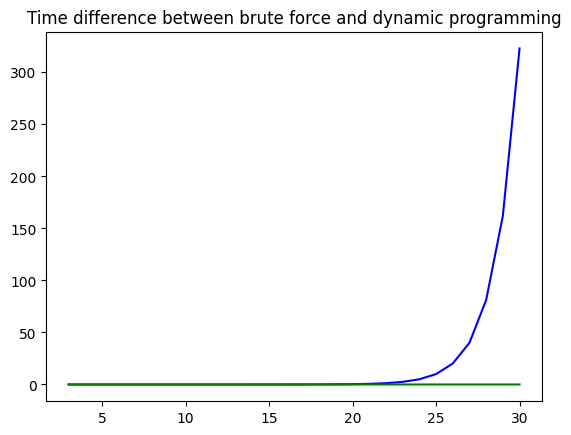

In [15]:
import matplotlib.pyplot as plt
plt.title("Time difference between brute force and dynamic programming")
plt.plot(test_ns, execution_times, label='Brute Force' , c='b')
plt.plot(test_ns, execution_times_dp, label='Dynamic Programming' , c= 'g')
plt.show()